In [456]:
import pandas as pd
import os
df = pd.read_csv('data_studentlist.csv', header='infer')
df.head(5)

,Name,Gender,Age,Grade,Absence,Bloodtype,Height,Weight
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
2,Brian Martin,M,24,4,N,B,175.0,80.1
3,David Hassel,M,23,3,N,AB,182.1,85.7
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5


In [457]:
##average height males
df[df["Gender"] == "M"]["Height"].mean()

172.41000000000003

In [458]:
df[df["Gender"] == "F"]["Height"].mean()

166.64285714285714

In [459]:
##Average weight males
df[df["Gender"] == "M"]["Weight"].mean()

68.50000000000001

In [460]:
df[df["Gender"] == "F"]["Weight"].mean()

50.44285714285714

In [461]:
#tallest student male
max = df[df["Gender"] == "M"]["Height"].max()
print(max)
print(df[df["Height"] == max])

182.1
           Name Gender  Age  Grade Absence Bloodtype  Height  Weight
3  David Hassel      M   23      3       N        AB   182.1    85.7


In [462]:
min = df[df["Gender"] == "F"]["Height"].min()
print(min)
print(df[df["Height"] == min])

155.2
          Name Gender  Age  Grade Absence Bloodtype  Height  Weight
6  Susan Clark      F   22      1       N         O   155.2    45.3


In [463]:
mask1 = df["Gender"] == "M"
mask2 = df["Height"] > 175
mask3 = mask1 & mask2
print(df[mask3]["Weight"].min())

61.3


In [464]:
mask1 = df["Gender"] == "F"
mask2 = df["Height"] < 160
mask3 = mask1 & mask2
print(df[mask3]["Weight"].max())

45.3


In [465]:
df[df["Absence"] == "N"]["Grade"].mean()

2.076923076923077

In [466]:
df[df["Absence"] == "Y"]["Grade"].mean()

3.0

In [467]:
mask1 = df["Bloodtype"] == "A"
mask2 = df["Bloodtype"] == "AB"
mask3 = mask1 | mask2
df[mask3]["Height"].mean()

172.64285714285714

In [468]:
mask0 = df["Gender"] == "M"
mask1 = df["Bloodtype"] == "A"
mask2 = df["Bloodtype"] == "AB"
mask3 = (mask1 | mask2) & mask0
df[mask3]["Height"].mean()

173.375

In [469]:
df
mask0 = df["Absence"] == "Y"
mask1 = df["Grade"] >= 3
mask2 = mask0 & mask1
df[mask2]["Age"].mean()

23.666666666666668

In [471]:
######################PART 2#########################
import pandas as pd
import numpy as np
import os
df = pd.read_csv('data_census.csv', header='infer')
df.Population = df.Population.astype(str).str.replace(',','').astype('int64')
df.Households = df.Households.astype(str).str.replace(',','').astype('int64')
df.shape
df.head(10) 

,Province Code,City Code,Population,Households,Person's Household,Gender Ratio
0,109,1001,10078850,4197478,2.40,0.97
1,109,1188,155695,72882,2.14,0.98
2,109,1189,126817,59614,2.13,1.00
3,109,1158,235186,108138,2.17,0.94
4,109,1105,298145,126915,2.35,0.99
5,109,1032,362197,158769,2.28,0.97
6,109,1065,362604,160110,2.26,1.01
7,109,1190,417976,177077,2.36,1.00
8,109,1106,464176,192670,2.41,0.96
9,109,1006,333523,141325,2.36,0.97


In [473]:
mask0 = df["Province Code"] == 115
mask1 = df["Province Code"] == 116
a = df[mask0]["Population"]
a.astype(float).sum()

1230500.0

In [474]:
mask0 = df["Gender Ratio"] > 1

p = df[mask0]
p.groupby('City Code')['Population'].agg(['mean'])

,mean
City Code,
1001,2.613991e+06
1002,6.169300e+04
1007,8.677100e+04
1009,6.738300e+04
1010,2.528230e+05
...,...
1230,6.925600e+04
1237,7.040000e+04
1238,5.682650e+05


In [475]:
df
df["Gender Ratio"]
mask0 = df["Gender Ratio"] > 1
mask1 = df["Person's Household"] 
df[mask0 & mask1]

,Province Code,City Code,Population,Households,Person's Household,Gender Ratio
6,109,1065,362604,160110,2.26,1.01
18,109,1043,238367,104331,2.28,1.04
21,109,1027,512921,249481,2.06,1.02
38,108,1007,86771,35770,2.43,1.08
41,108,1089,240772,96928,2.48,1.04
...,...,...,...,...,...,...
266,103,1010,252823,100073,2.53,1.12
267,103,1131,296521,115235,2.57,1.01
269,103,1230,69256,30798,2.25,1.02
278,115,1001,615250,251478,2.45,1.01


In [476]:
df
df.sort_values("Households", ascending=False).head(10)

,Province Code,City Code,Population,Households,Person's Household,Gender Ratio
83,102,1001,12432063,4829521,2.57,1.01
0,109,1001,10078850,4197478,2.40,0.97
26,108,1001,3517491,1430441,2.46,0.98
254,103,1001,3356540,1356430,2.47,1.02
228,104,1001,2697791,1160150,2.33,1.01
52,112,1001,2914271,1145232,2.54,1.01
43,106,1001,2491137,977714,2.55,0.99
170,116,1001,2068444,878544,2.35,1.03
205,113,1001,1902638,827264,2.30,1.00
188,114,1001,1869668,778350,2.40,0.99


In [477]:
###############part 3#######################
import pandas as pd
import numpy as np
import os

df = pd.read_csv('data_sales.csv', header='infer')
df.shape
df.head(5)

,Date,Region,Item,Unit Price,Units
0,04-Jul-14,East,Pen Set,4.99,62
1,12-Jul-14,East,Binder,1.99,29
2,21-Jul-14,Central,Pen Set,12.49,55
3,29-Jul-14,East,Binder,19.99,81
4,07-Aug-14,Central,Pen Set,23.95,42


In [478]:
df["Amount"] = df["Units"] * df["Unit Price"]
df.head(5)

,Date,Region,Item,Unit Price,Units,Amount
0,04-Jul-14,East,Pen Set,4.99,62,309.38
1,12-Jul-14,East,Binder,1.99,29,57.71
2,21-Jul-14,Central,Pen Set,12.49,55,686.95
3,29-Jul-14,East,Binder,19.99,81,1619.19
4,07-Aug-14,Central,Pen Set,23.95,42,1005.90


In [479]:
df.groupby("Region")["Unit Price"].mean()

Region
Central    18.018750
East        9.143846
West       53.658333
Name: Unit Price, dtype: float64

In [392]:
df1=df.pivot_table(index='Region',values=['Unit Price'])
df1

,Unit Price
Region,
Central,18.018750
East,9.143846
West,53.658333


In [394]:
df.groupby("Region")["Unit Price", "Units"].mean()

/tmp/ipykernel_101791/525941124.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Region")["Unit Price", "Units"].mean()


,Unit Price,Units
Region,,
Central,18.018750,49.958333
East,9.143846,53.153846
West,53.658333,38.500000


In [432]:
df1=df.pivot_table(index='Region',values=["Unit Price", "Units"]).fillna(0)
print(df1)
print("\n",df1.sum(axis=1),"\n\n",df1.sum(axis=0))

         Unit Price      Units
Region                        
Central   18.018750  49.958333
East       9.143846  53.153846
West      53.658333  38.500000

 Region
Central    67.977083
East       62.297692
West       92.158333
dtype: float64 

 Unit Price     80.820929
Units         141.612179
dtype: float64


In [433]:
df1=df.pivot_table(index='Region', columns = "Item",values=["Units"]).fillna(0)
print(df1)
print("\n",df1.sum(axis=1),"\n\n",df1.sum(axis=0))

         Units                                      
Item    Binder Desk        Pen    Pen Set     Pencil
Region                                              
Central   53.0  3.5  27.000000  60.750000  55.333333
East      46.8  0.0  58.333333  50.666667  65.000000
West      32.0  3.0  76.000000   0.000000  44.000000

 Region
Central    199.583333
East       220.800000
West       155.000000
dtype: float64 

        Item   
Units  Binder     131.800000
       Desk         6.500000
       Pen        161.333333
       Pen Set    111.416667
       Pencil     164.333333
dtype: float64


In [434]:
df1=df.pivot_table(index='Region',columns = "Item",values=['Amount']).fillna(0)
print(df1)
print("\n",df1.sum(axis=1),"\n\n",df1.sum(axis=0))

            Amount                                           
Item        Binder   Desk         Pen     Pen Set      Pencil
Region                                                       
Central  720.32875  437.5  539.730000  605.347500  171.146667
East     507.13200    0.0  451.416667  582.826667  181.850000
West     639.68000  825.0  151.240000    0.000000  115.560000

 Region
Central    2474.052917
East       1723.225333
West       1731.480000
dtype: float64 

         Item   
Amount  Binder     1867.140750
        Desk       1262.500000
        Pen        1142.386667
        Pen Set    1188.174167
        Pencil      468.556667
dtype: float64


In [480]:
##################PART 4########################
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

df = pd.read_csv('data_coffeeshop.csv', header='infer',na_values=[' '])
df.shape
x = df["Year of Start"]
y = df["Year of Start"].value_counts()
df.head(5)

,Year of Start,Current State,Size of Site
0,2008.0,In,20.80
1,2010.0,In,212.72
2,2013.0,In,20.04
3,2012.0,In,64.17
4,2002.0,Out,11.40


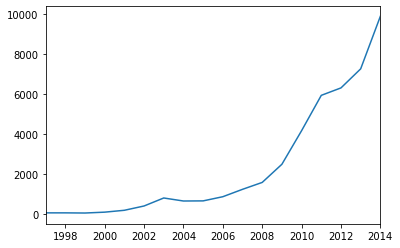

<Figure size 800x560 with 0 Axes>

In [481]:
fig,ax= plt.subplots()
plt.figure(figsize=(10,7), dpi= 80)
ax.set_xlim(1997,2014)
ax.plot(y.sort_index(ascending=False))
##Significant increase of active coffe shops by the start of the year 2008

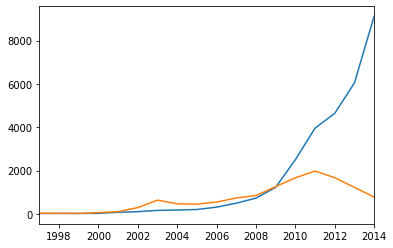

<Figure size 800x560 with 0 Axes>

In [482]:
a = df[df["Current State"] == "In"]["Year of Start"].value_counts().sort_index(ascending=False)
out = df[df["Current State"] == "Out"]["Year of Start"].value_counts().sort_index(ascending=False)
fig,ax= plt.subplots()
plt.figure(figsize=(10,7), dpi= 80)
ax.set_xlim(1997,2014)
ax.plot(a)
ax.plot(out)
##Significant increase of active coffe shops over latest years on inner states
##Small increase of outer inactive coffe shops compared to Inner shops but a decrease after the year 2011

In [258]:
## from figure 1 & 2 we can see that many coffe shops before 2009 had similar numbers on activity and inactivity
#, but after 2009 many busnisses kept being active compared to inactive ones, we might conclude the rise of 
#entrepreneurship or the popularity of coffe shops